In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras import layers
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import h5py

%matplotlib inline

Using TensorFlow backend.


In [3]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [4]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
input_shape=(28,28,1)
num_classes=10
y_train=df_train["label"]
x_train=df_train.drop(labels=["label"],axis=1)
x_test=df_test

x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

In [6]:
x_train = x_train.values.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.values.reshape(x_test.shape[0], 28, 28, 1)

# In case you don't want to train the whole model,go to the last cell and load the model directly

In [7]:
x_train.shape

(42000, 28, 28, 1)

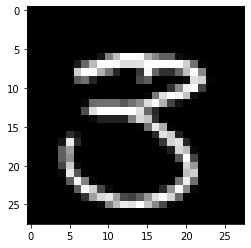

In [8]:
plt.imshow(x_train[7,:,:,0],cmap='gray')

In [9]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
x_train, x_dev, y_train, y_dev = train_test_split(x_train, y_train, test_size=0.1, random_state=1)
y_train=to_categorical(y_train,num_classes)
y_dev=to_categorical(y_dev,num_classes)

In [10]:
def Cmodel(input_shape):
    X_input=keras.Input(input_shape)
    X=X_input
    X=layers.Conv2D(32,(3,3),padding='valid',activation='relu',name='conv1')(X)
    X=layers.MaxPooling2D(pool_size=(2,2),name='pool1')(X)

    X=layers.Conv2D(64,(5,5),activation='relu',name='conv2')(X)
    X=layers.MaxPooling2D(pool_size=(2,2),name='pool2')(X)

    X=layers.Flatten()(X)
    X=layers.Dropout(0.5)(X)
    X=layers.Dense(10,activation="softmax",name='fc')(X)

    model = keras.models.Model(inputs = X_input, outputs = X, name='digit_classification')
    return model


In [11]:
digit_class=Cmodel(x_train.shape[1:])

In [12]:
digit_class.summary()

Model: "digit_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 26, 26, 32)        320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 9, 9, 64)          51264     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)     

In [13]:
batch_size=128
epochs=25
digit_class.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
digit_class.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_dev,y_dev))

Train on 37800 samples, validate on 4200 samples
Epoch 1/25
37800/37800 [==============================] - 20s 527us/step - loss: 0.4318 - accuracy: 0.8660 - val_loss: 0.1131 - val_accuracy: 0.9681
Epoch 2/25
37800/37800 [==============================] - 20s 529us/step - loss: 0.1263 - accuracy: 0.9605 - val_loss: 0.0806 - val_accuracy: 0.9781
Epoch 3/25
37800/37800 [==============================] - 20s 521us/step - loss: 0.0919 - accuracy: 0.9723 - val_loss: 0.0577 - val_accuracy: 0.9829
Epoch 4/25
37800/37800 [==============================] - 20s 523us/step - loss: 0.0735 - accuracy: 0.9771 - val_loss: 0.0535 - val_accuracy: 0.9843
Epoch 5/25
37800/37800 [==============================] - 20s 531us/step - loss: 0.0635 - accuracy: 0.9807 - val_loss: 0.0503 - val_accuracy: 0.9850
Epoch 6/25
37800/37800 [==============================] - 20s 526us/step - loss: 0.0580 - accuracy: 0.9818 - val_loss: 0.0448 - val_accuracy: 0.9869
Epoch 7/25
37800/37800 [==============================] -

In [14]:
score=digit_class.evaluate(x_dev,y_dev)

4200/4200 [==============================] - 1s 132us/step


In [15]:
print(score[0],score[1])

0.03492816981119415 0.9895238280296326


In [16]:
x_test.shape

(28000, 28, 28, 1)

In [17]:
result=digit_class.predict(x_test[:,:,:,:])
result=result>0.5
# print(result)

In [78]:
result=1.0*result

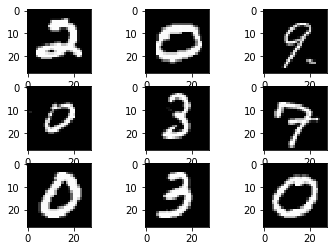

In [32]:
for i in range(9):
	# define subplot
	plt.subplot(330+1 + i)
	# plot raw pixel data
	plt.imshow(x_test[i,:,:,0], cmap='gray')
# show the figure
plt.show()

In [26]:
for i in range(9):
    var=np.where(result[i]==1)
    print(var[0])

[2]
[0]
[9]
[9]
[3]
[7]
[0]
[3]
[0]


In [33]:
digit_class.save("model.h5")
print("Saved to disk")

Saved to disk


In [34]:
from keras.models import load_model
model2=load_model('model.h5')
model2.summary()

Model: "digit_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 26, 26, 32)        320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 9, 9, 64)          51264     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)     

In [35]:
score2=model2.evaluate(x_dev,y_dev)
score2

4200/4200 [==============================] - 1s 133us/step


[0.03492816981119415, 0.9895238280296326]